# ElectronicsMart Data Analytics Case Study

ElectronicsMart, a leading global electronics retailer, has experienced a significant downturn in sales, with a nearly 50% decline in revenue in 2020 compared to the previous year. In response to this challenge, the company is actively seeking a sharp Data Analyst to join their growing team.

## How can we help here?

Our task is to analyze the customer-level transactional data to identify potential reasons behind the decline in sales. The objective is to recommend data-driven strategies aimed at improving sales performance.

## Features of the dataset:

➡️ Customers Table: Contains information about customers, including customer key, demographics (age, gender, location), and last purchase date.


➡️ Products Table: Contains information about products, including product key, category, unit price, and brand.


➡️ Sales Table: Contains information about orders placed, including order number, order date, and quantity.

## Importing Libraries

In [1]:
# importing the required modules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import scipy.stats as spy
from scipy.stats import norm,zscore,boxcox,probplot
from scipy.stats import ttest_ind,ttest_rel,mannwhitneyu,wilcoxon
from scipy.stats import shapiro,levene,kstest,anderson
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler , MinMaxScaler , OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Reading the CSV files data for ElectronicsMart Dataset
sales_data = pd.read_csv('Dataset/Sales.csv')
products_data = pd.read_csv('Dataset/Products.csv')
customers_data = pd.read_csv('Dataset/Customers.csv', encoding='latin1')

## 

In [3]:
display(sales_data.info())
display(products_data.info())
display(customers_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


None

In [4]:
# Displaying data types of each column
display(pd.DataFrame({'Sales Data': sales_data.dtypes}).T)
display(pd.DataFrame({'Products Data': products_data.dtypes}).T)
display(pd.DataFrame({'Customers Data': customers_data.dtypes}).T)

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
Sales Data,int64,int64,object,object,int64,int64,int64,int64,object


,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
Products Data,int64,object,object,object,object,object,int64,object,int64,object


,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
Customers Data,int64,object,object,object,object,object,object,object,object,object


In [5]:
# Finding the number of rows and columns given in all the datasets 
display("Sales data")
print(f"Total number of rows are {sales_data.shape[0]}\nTotal number of columns are {sales_data.shape[1]}")
print('*'*40)
display("Products data")
print(f"Total number of rows are {products_data.shape[0]}\nTotal number of columns are {products_data.shape[1]}")
print('*'*40)
display("Customers data")
print(f"Total number of rows are {customers_data.shape[0]}\nTotal number of columns are {customers_data.shape[1]}")


'Sales data'

Total number of rows are 62884
Total number of columns are 9
****************************************


'Products data'

Total number of rows are 2517
Total number of columns are 10
****************************************


'Customers data'

Total number of rows are 15266
Total number of columns are 10


In [6]:
# Summary statistics for numerical columns in all datasets 

display('Sales Data' , sales_data.describe(include='int'))
print('_'*100)
display('Products Data' ,products_data.describe(include='int'))
print('_'*100)
display('Customers Data' ,customers_data.describe(include='int'))

'Sales Data'

,Order Number,Line Item,CustomerKey,StoreKey,ProductKey,Quantity
count,6.288400e+04,62884.000000,6.288400e+04,62884.000000,62884.000000,62884.000000
mean,1.430905e+06,2.164207,1.180797e+06,31.802144,1125.859344,3.144790
std,4.532963e+05,1.365170,5.859634e+05,22.978188,709.244010,2.256371
min,3.660000e+05,1.000000,3.010000e+02,0.000000,1.000000,1.000000
25%,1.121017e+06,1.000000,6.808580e+05,8.000000,437.000000,1.000000
50%,1.498016e+06,2.000000,1.261200e+06,37.000000,1358.000000,2.000000
75%,1.788010e+06,3.000000,1.686496e+06,53.000000,1650.000000,4.000000
max,2.243032e+06,7.000000,2.099937e+06,66.000000,2517.000000,10.000000


____________________________________________________________________________________________________


'Products Data'

,ProductKey,SubcategoryKey,CategoryKey
count,2517.000000,2517.000000,2517.000000
mean,1259.000000,491.810091,4.878824
std,726.739637,229.887134,2.299170
min,1.000000,101.000000,1.000000
25%,630.000000,305.000000,3.000000
50%,1259.000000,406.000000,4.000000
75%,1888.000000,801.000000,8.000000
max,2517.000000,808.000000,8.000000


____________________________________________________________________________________________________


'Customers Data'

,CustomerKey
count,1.526600e+04
mean,1.060508e+06
std,6.127097e+05
min,3.010000e+02
25%,5.140335e+05
50%,1.079244e+06
75%,1.593980e+06
max,2.099937e+06


In [7]:
# # Replace null values in delivery_date column with 'Not Delivered'
sales_data['Delivery Date'].fillna('Not Delivered', inplace=True)

In [8]:
# # Replace null values in State Code column with 'State Code'
customers_data['State Code'].fillna('Unknown State Code', inplace=True)

In [9]:
sales_data['Delivery Date'] = pd.to_datetime(sales_data['Delivery Date'], errors='coerce')
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'], errors='coerce')


In [10]:
#Viewing and understanding few 5 rows of the all datasets dataframe
display(sales_data.head())
print('--'*70)
display(products_data.head())
print('--'*70)
display(customers_data.head())

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,2016-01-01,NaT,265598,10,1304,1,CAD
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD


--------------------------------------------------------------------------------------------------------------------------------------------


,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio


--------------------------------------------------------------------------------------------------------------------------------------------


,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,07-03-1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965


In [11]:
from datetime import datetime

# Assuming sales_data is your DataFrame containing order data

# Calculate Recency
NOW = datetime.now()
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'], format='%m/%d/%Y')
recency_df = sales_data.groupby('CustomerKey')['Order Date'].max().reset_index()
recency_df['Recency'] = (NOW - recency_df['Order Date']).dt.days
recency_df.head()

,CustomerKey,Order Date,Recency
0,301,2019-11-11,1644.0
1,325,2020-01-04,1590.0
2,554,2019-12-05,1620.0
3,1042,2018-03-06,2259.0
4,1314,NaT,NaN


In [12]:
# Calculate Frequency and Monetary Value
rfm_df = sales_data.groupby('CustomerKey').agg({'Order Number': lambda x: len(x), 'Quantity': lambda x: x.sum()})
rfm_df.rename(columns={'Order Number': 'Frequency', 'Quantity': 'MonetaryValue'}, inplace=True)
rfm_df.head()

,Frequency,MonetaryValue
CustomerKey,,
301,1,2
325,10,27
554,4,14
1042,3,6
1314,5,13


In [13]:
# Merge RFM with Recency 
rfm_df = pd.merge(rfm_df, recency_df, on='CustomerKey')

In [14]:
#Standardize RFM values
scaler = StandardScaler()

rfm_df[['Recency', 'Frequency', 'MonetaryValue']] = scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'MonetaryValue']])

In [15]:
rfm_df.head()

,CustomerKey,Frequency,MonetaryValue,Order Date,Recency
0,301,-1.075231,-1.076312,2019-11-11,-0.602902
1,325,1.180420,0.762103,2020-01-04,-0.724832
2,554,-0.323347,-0.193873,2019-12-05,-0.657093
3,1042,-0.573975,-0.782166,2018-03-06,0.785750
4,1314,-0.072719,-0.267409,NaT,NaN


In [16]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Create a copy of the DataFrame with RFM values
rfm_data = rfm_df[['Recency', 'Frequency', 'MonetaryValue']].copy()

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
rfm_data_imputed = imputer.fit_transform(rfm_data)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_data_imputed)

# Print the resulting DataFrame with clusters
print(rfm_df)


       CustomerKey  Frequency  MonetaryValue Order Date   Recency  Cluster
0              301  -1.075231      -1.076312 2019-11-11 -0.602902        0
1              325   1.180420       0.762103 2020-01-04 -0.724832        2
2              554  -0.323347      -0.193873 2019-12-05 -0.657093        0
3             1042  -0.573975      -0.782166 2018-03-06  0.785750        0
4             1314  -0.072719      -0.267409        NaT       NaN        0
...            ...        ...            ...        ...       ...      ...
11882      2099383   0.177908       0.467957 2020-02-06 -0.799345        2
11883      2099600  -0.573975      -0.488019 2018-08-08  0.435765        0
11884      2099758  -0.323347      -0.561556 2020-06-10 -1.081591        0
11885      2099862  -0.573975      -1.002775 2020-01-01 -0.718058        0
11886      2099937   0.177908       0.762103        NaT       NaN        2

[11887 rows x 6 columns]


## Merge all the datasets 

In [17]:
# Assuming 'CustomerKey' and 'ProductKey' are common columns for joining

# Join sales_data with customers_data on 'CustomerKey'
merged_data = pd.merge(sales_data, customers_data, on='CustomerKey', how='left')

# Join merged_data with products_data on 'ProductKey'
merged_data = pd.merge(merged_data, products_data, on='ProductKey', how='left')

# Display the merged data
dataset = pd.DataFrame(merged_data)
dataset

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Gender,...,Birthday,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,366000,1,2016-01-01,NaT,265598,10,1304,1,CAD,Male,...,3/23/1971,Contoso Lens Adapter M450 White,Contoso,White,$31.27,$68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,Male,...,11/20/1995,A. Datum SLR Camera X136 Silver,A. Datum,Silver,$141.47,$427.00,402,Digital SLR Cameras,4,Cameras and camcorders
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,Male,...,11/20/1995,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,Black,$220.64,$665.94,803,Microwaves,8,Home Appliances
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,Female,...,8/24/1962,Contoso SLR Camera M146 Orange,Contoso,Orange,$148.08,$322.00,402,Digital SLR Cameras,4,Cameras and camcorders
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,Female,...,8/24/1962,Adventure Works Laptop8.9 E0890 White,Adventure Works,White,$166.20,$326.00,301,Laptops,3,Computers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,2243030,1,NaT,NaT,1216913,43,632,3,USD,Male,...,4/16/1939,WWI Screen 85in E1010 White,Wide World Importers,White,$70.87,$139.00,305,Projectors & Screens,3,Computers
62880,2243031,1,NaT,2021-02-24,511229,0,98,4,EUR,Female,...,03-10-1940,WWI Wireless Bluetooth Stereo Headphones M170 ...,Wide World Importers,Silver,$55.18,$120.00,106,Bluetooth Headphones,1,Audio
62881,2243032,1,NaT,2021-02-23,331277,0,1613,2,CAD,Male,...,5/25/1993,SV DVD 7-Inch Player Portable E200 White,Southridge Video,White,$56.08,$109.99,602,Movie DVD,6,"Music, Movies and Audio Books"
62882,2243032,2,NaT,2021-02-23,331277,0,1717,2,CAD,Male,...,5/25/1993,MGS Flight Simulator X M250,Tailspin Toys,Pink,$32.25,$70.13,702,Download Games,7,Games and Toys


### Checking Null values in the dataset

In [18]:
pd.DataFrame(dataset.isna().sum().sort_values(ascending=False))

,0
Delivery Date,49719
Order Date,38540
Order Number,0
Country,0
CategoryKey,0
Subcategory,0
SubcategoryKey,0
Unit Price USD,0
Unit Cost USD,0
Color,0


### Checking Duplicate values in the dataset

In [19]:
dataset.duplicated().value_counts()

False    62884
Name: count, dtype: int64

In [20]:
display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order Number    62884 non-null  int64         
 1   Line Item       62884 non-null  int64         
 2   Order Date      24344 non-null  datetime64[ns]
 3   Delivery Date   13165 non-null  datetime64[ns]
 4   CustomerKey     62884 non-null  int64         
 5   StoreKey        62884 non-null  int64         
 6   ProductKey      62884 non-null  int64         
 7   Quantity        62884 non-null  int64         
 8   Currency Code   62884 non-null  object        
 9   Gender          62884 non-null  object        
 10  Name            62884 non-null  object        
 11  City            62884 non-null  object        
 12  State Code      62884 non-null  object        
 13  State           62884 non-null  object        
 14  Zip Code        62884 non-null  object        
 15  Co

None

### Checking the unique values for columns

In [21]:
for i in dataset.columns:
    print(f'Unique Values in {i} column are :- {dataset[i].unique()}\n')


Unique Values in Order Number column are :- [ 366000  366001  366002 ... 2243030 2243031 2243032]

Unique Values in Line Item column are :- [1 2 3 4 5 6 7]

Unique Values in Order Date column are :- <DatetimeArray>
['2016-01-01 00:00:00', '2016-01-02 00:00:00', '2016-01-03 00:00:00',
 '2016-01-04 00:00:00', '2016-01-05 00:00:00', '2016-01-06 00:00:00',
 '2016-01-07 00:00:00', '2016-01-08 00:00:00', '2016-01-09 00:00:00',
 '2016-01-10 00:00:00',
 ...
 '2021-02-02 00:00:00', '2021-02-03 00:00:00', '2021-02-04 00:00:00',
 '2021-02-05 00:00:00', '2021-02-06 00:00:00', '2021-02-08 00:00:00',
 '2021-02-09 00:00:00', '2021-02-10 00:00:00', '2021-02-11 00:00:00',
 '2021-02-12 00:00:00']
Length: 664, dtype: datetime64[ns]

Unique Values in Delivery Date column are :- <DatetimeArray>
[                'NaT', '2016-01-13 00:00:00', '2016-01-12 00:00:00',
 '2016-01-08 00:00:00', '2016-01-06 00:00:00', '2016-01-10 00:00:00',
 '2016-01-11 00:00:00', '2016-01-07 00:00:00', '2016-01-09 00:00:00',
 '201

In [22]:
for i in dataset.columns:
    print(f"Unique entries for column {i:<19} =  {dataset[i].nunique()}")

Unique entries for column Order Number        =  26326
Unique entries for column Line Item           =  7
Unique entries for column Order Date          =  663
Unique entries for column Delivery Date       =  1492
Unique entries for column CustomerKey         =  11887
Unique entries for column StoreKey            =  58
Unique entries for column ProductKey          =  2492
Unique entries for column Quantity            =  10
Unique entries for column Currency Code       =  5
Unique entries for column Gender              =  2
Unique entries for column Name                =  11783
Unique entries for column City                =  6570
Unique entries for column State Code          =  449
Unique entries for column State               =  491
Unique entries for column Zip Code            =  7771
Unique entries for column Country             =  8
Unique entries for column Continent           =  3
Unique entries for column Birthday            =  9382
Unique entries for column Product Name        =

What is the time period for which the data is given ?

In [23]:
print(f"Minimum time for Order Date - {dataset['Order Date'].min()}\nMaximum time for Order Date - {dataset['Order Date'].max()}")

Minimum time for Order Date - 2016-01-01 00:00:00
Maximum time for Order Date - 2021-02-12 00:00:00


In [24]:
print(f"Minimum time for Delivery Date - {dataset['Delivery Date'].min()}\nMaximum time for Delivery Date - {dataset['Delivery Date'].max()}")

Minimum time for Delivery Date - 2016-01-06 00:00:00
Maximum time for Delivery Date - 2021-02-27 00:00:00


### Exploring the distribution of customer demographics such as gender, state, etc.

In [25]:
dataset.head(2)

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Gender,...,Birthday,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,366000,1,2016-01-01,NaT,265598,10,1304,1,CAD,Male,...,3/23/1971,Contoso Lens Adapter M450 White,Contoso,White,$31.27,$68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,Male,...,11/20/1995,A. Datum SLR Camera X136 Silver,A. Datum,Silver,$141.47,$427.00,402,Digital SLR Cameras,4,Cameras and camcorders


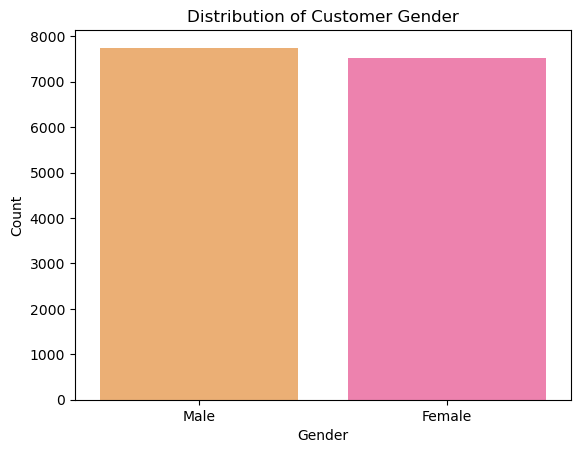

In [26]:
gender_counts = customers_data['Gender'].value_counts()

# Create the bar plot
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=['#FFAF61', '#FF70AB'])

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Customer Gender')

# Show the plot
plt.show()


In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order Number    62884 non-null  int64         
 1   Line Item       62884 non-null  int64         
 2   Order Date      24344 non-null  datetime64[ns]
 3   Delivery Date   13165 non-null  datetime64[ns]
 4   CustomerKey     62884 non-null  int64         
 5   StoreKey        62884 non-null  int64         
 6   ProductKey      62884 non-null  int64         
 7   Quantity        62884 non-null  int64         
 8   Currency Code   62884 non-null  object        
 9   Gender          62884 non-null  object        
 10  Name            62884 non-null  object        
 11  City            62884 non-null  object        
 12  State Code      62884 non-null  object        
 13  State           62884 non-null  object        
 14  Zip Code        62884 non-null  object        
 15  Co

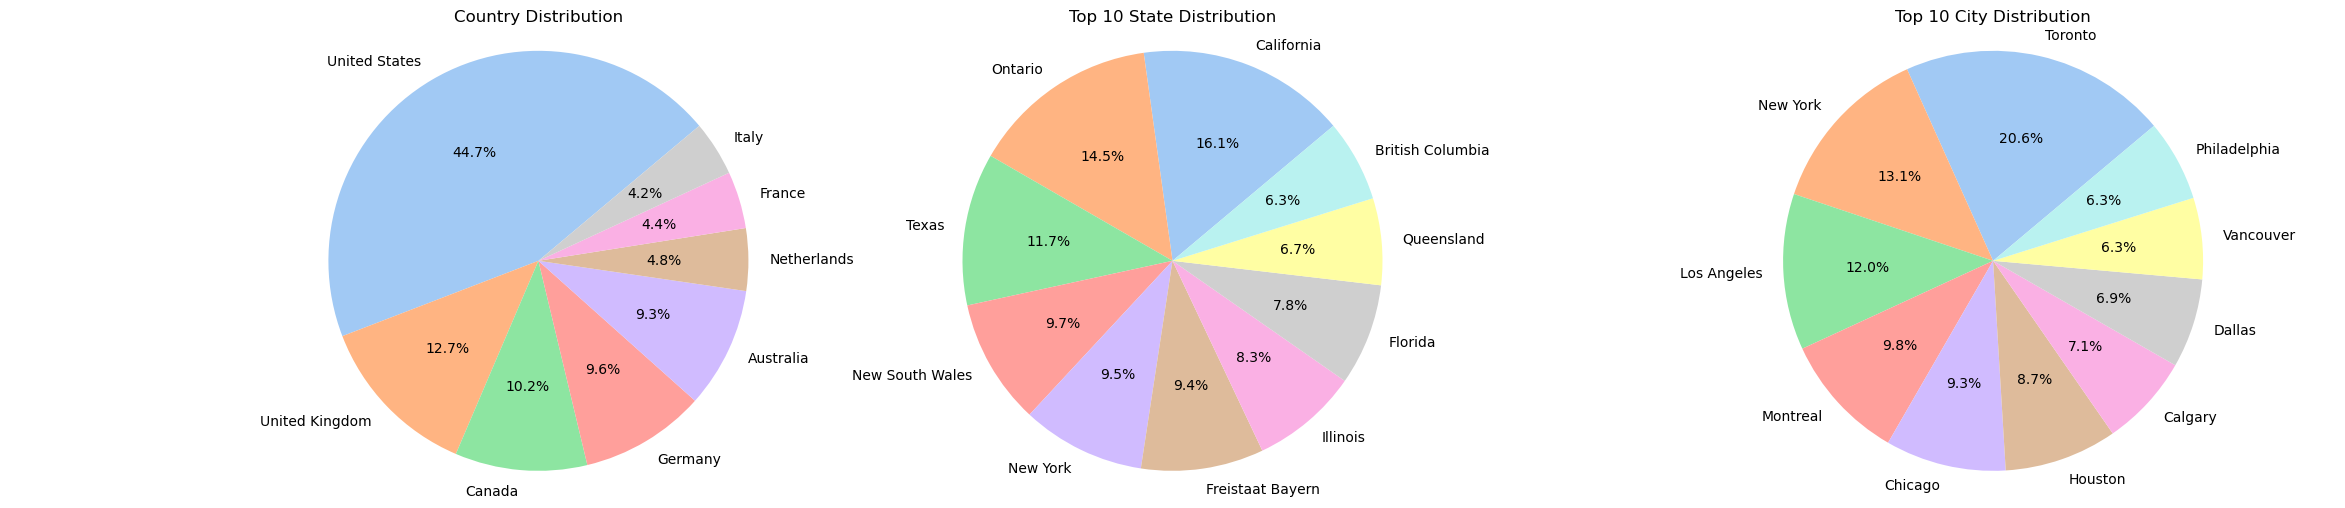

In [28]:
# Set the color palette to pastel
sns.set_palette("pastel")

country_counts = customers_data['Country'].value_counts()
state_counts = customers_data['State'].value_counts()[:10]
city_counts = customers_data['City'].value_counts()[:10]

# Create the figure and subplots
plt.figure(figsize=(30, 6))  # Adjust the figure size as needed
plt.subplot(1, 2, 1)  # Subplot 1 of 3
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=40)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Country Distribution')  # Title for subplot 1

plt.subplot(1, 3, 2)  # Subplot 2 of 3
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=40)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 10 State Distribution')  # Title for subplot 2

plt.subplot(1, 3, 3)  # Subplot 2 of 3
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=40)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 10 City Distribution')  # Title for subot 2

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


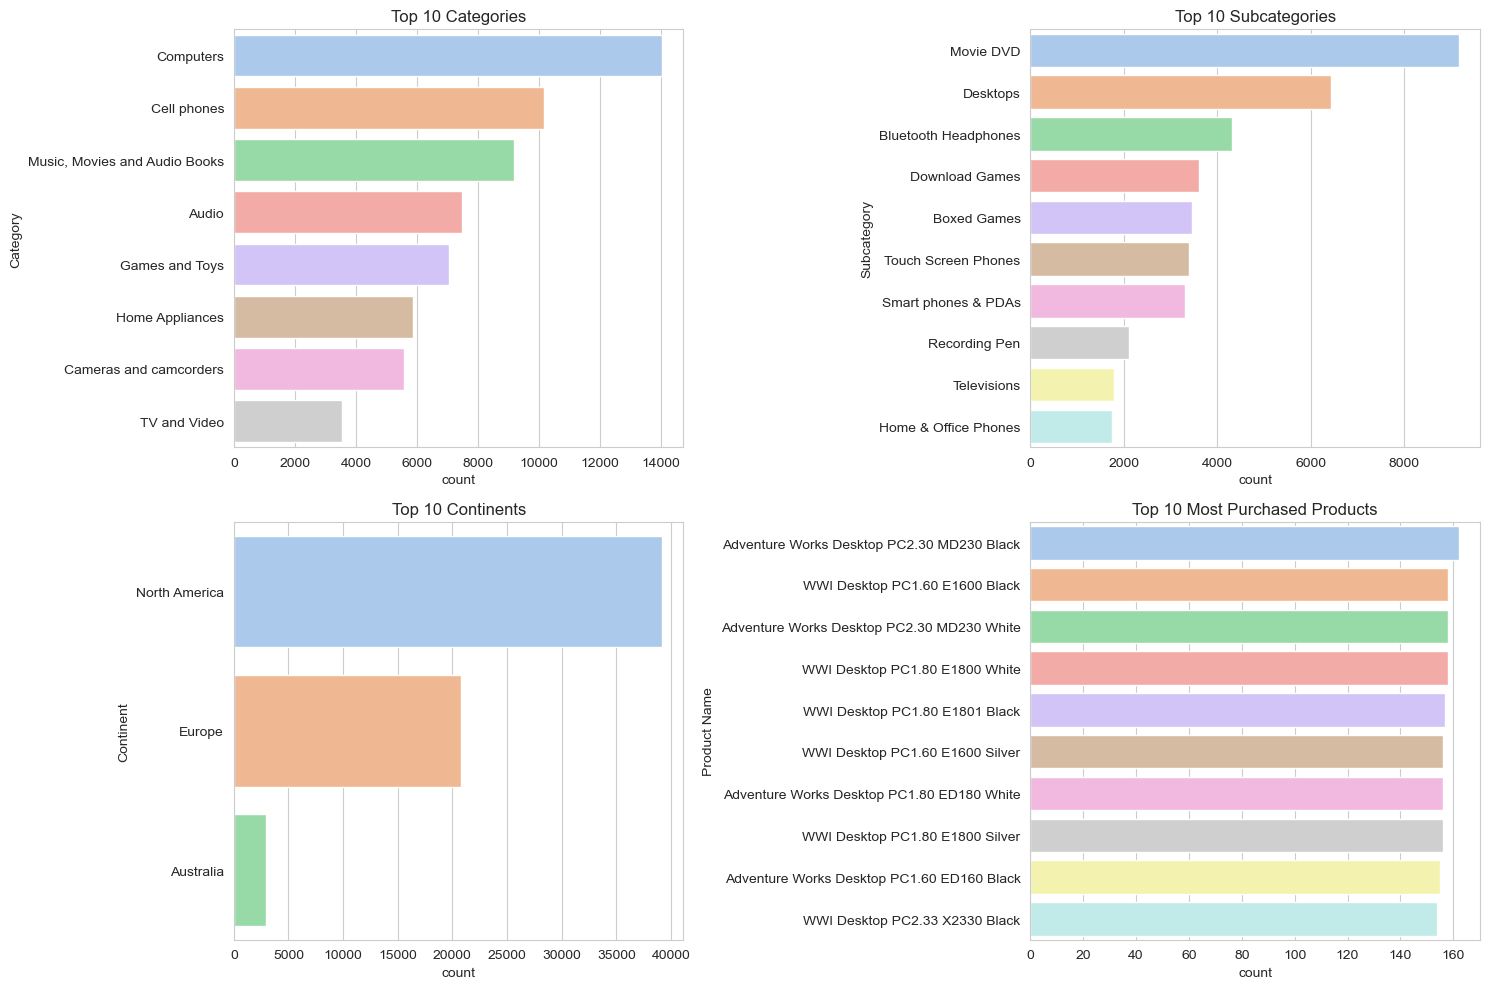

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for seaborn plots
sns.set_style("whitegrid")

# Define the subplot layout
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot count plots for each variable
sns.countplot(y='Category', data=dataset, order=dataset['Category'].value_counts().index[:10], ax=axes[0, 0])
axes[0, 0].set_title('Top 10 Categories')

sns.countplot(y='Subcategory', data=dataset, order=dataset['Subcategory'].value_counts().index[:10], ax=axes[0, 1])
axes[0, 1].set_title('Top 10 Subcategories')

sns.countplot(y='Continent', data=dataset, order=dataset['Continent'].value_counts().index[:10], ax=axes[1, 0])
axes[1, 0].set_title('Top 10 Continents')

sns.countplot(y='Product Name', data=dataset, order=dataset['Product Name'].value_counts().index[:10], ax=axes[1, 1])
axes[1, 1].set_title('Top 10 Most Purchased Products')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


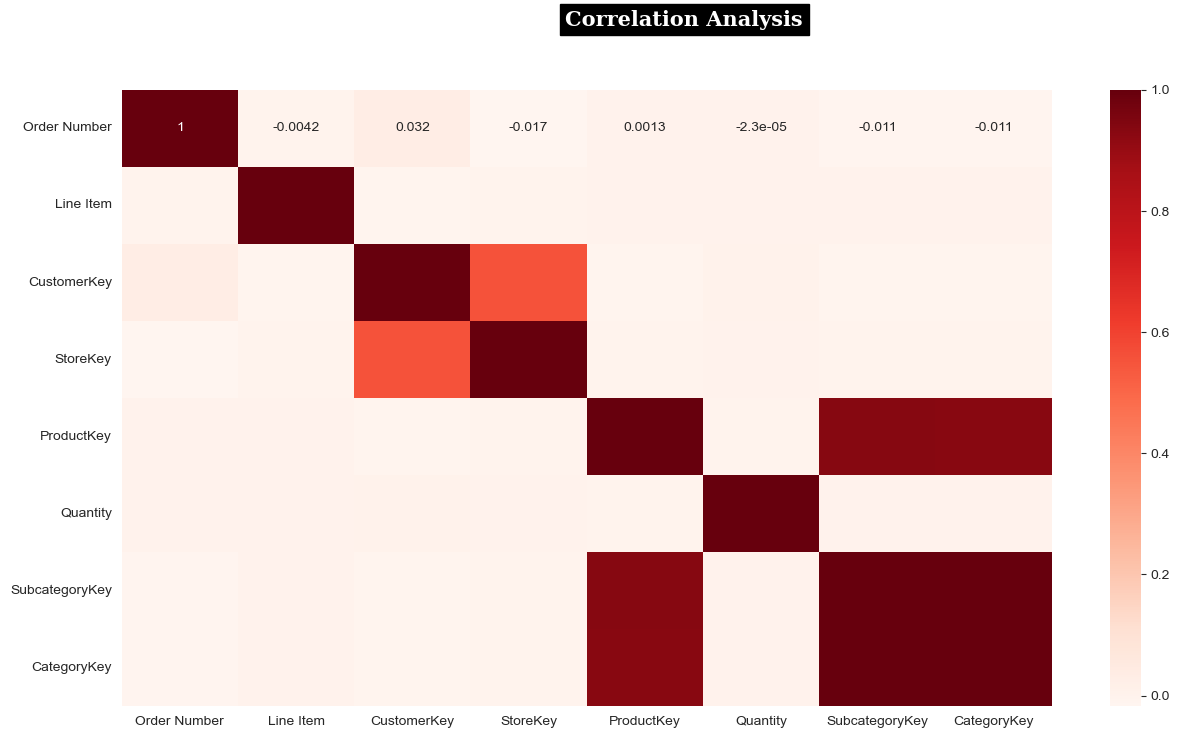

In [30]:
# Select only numeric columns for correlation analysis
numeric_cols = dataset.select_dtypes(include=['float64', 'int64'])

# Create correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(15, 8))
plt.suptitle('Correlation Analysis', fontfamily='serif', fontweight='bold', fontsize=15, backgroundcolor='k', color='w')
sns.heatmap(data=correlation_matrix, annot=True, cmap='Reds')
plt.show()


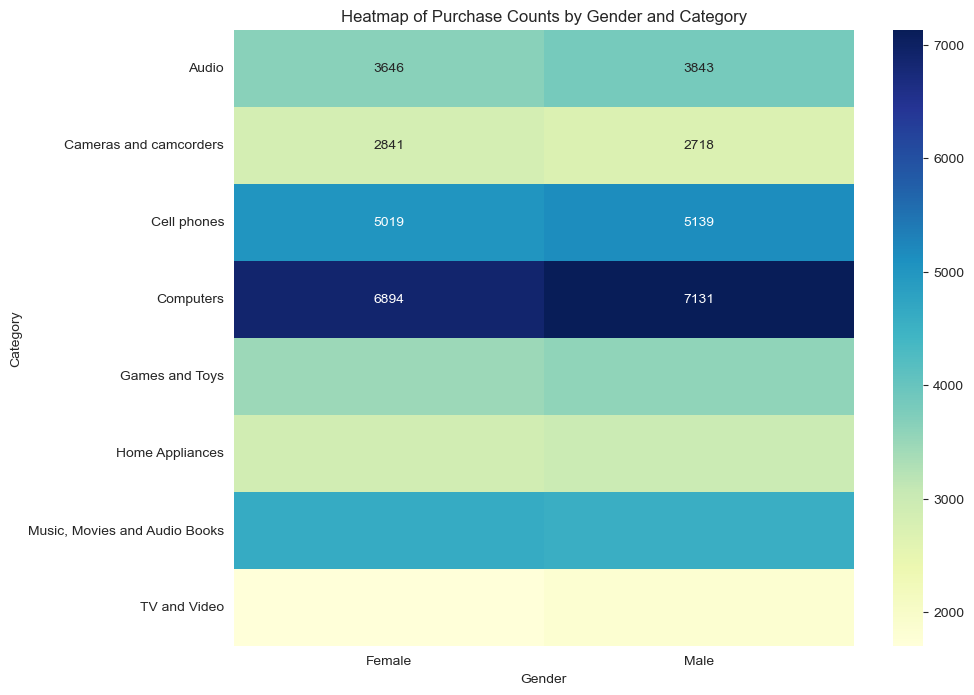

In [31]:
# Calculate the counts for each combination of categories
multivariate_data = dataset.groupby(['Gender', 'Category']).size().reset_index(name='Count')

# Pivot the data to create a matrix for heatmap
multivariate_matrix = multivariate_data.pivot(index='Category', columns='Gender', values='Count')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(multivariate_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Purchase Counts by Gender and Category')
plt.xlabel('Gender')
plt.ylabel('Category')
plt.show()


## User Segmentation

We can use various attributes for customer segmentation. Here's how we can segment customers based on different factors:

> Demographic Segmentation:

>> Gender: Segment customers based on gender (Male/Female/Other).

>> Age: If provided, segment customers into age groups (e.g., <25, 25-40, 40-60, 60+).

In [32]:
# Gender segmentation
gender_segments = dataset['Gender'].value_counts()

# Age segmentation (if 'Birthday' column is available)
# Assuming 'Birthday' column is in datetime format
dataset['Birthday'] = pd.to_datetime(dataset['Birthday'], errors='coerce', format='%m/%d/%Y')

# Calculate age from 'Birthday' column
now = pd.Timestamp.now()
dataset['Age'] = (now - dataset['Birthday'])

In [33]:
# Convert timedelta to days
dataset['Age_days'] = dataset['Age'].dt.days

# Define bins in terms of days
bins = [0, 25*365, 40*365, 60*365, float('inf')]

# Labels for the bins
labels = ['<25', '25-40', '40-60', '60+']

# Create age segments
age_segments = pd.cut(dataset['Age_days'], bins=bins, labels=labels).value_counts()

# Displaying the counts of customers in each age segment
print(age_segments)


Age_days
60+      16408
40-60    11116
25-40     8604
<25       1704
Name: count, dtype: int64


> Behavioral Segmentation:

>> Purchase Frequency: Segment customers based on how often they make purchases.

>> Total Spend: Segment customers based on the total amount they've spent.


In [34]:
# Purchase Frequency segmentation
purchase_frequency_segments = dataset['CustomerKey'].value_counts()

# Total Spend segmentation
total_spend_segments = dataset.groupby('CustomerKey')['Unit Price USD'].sum()


In [35]:
purchase_frequency_segments

CustomerKey
723572     36
1579183    32
1925694    32
1942072    29
1972249    29
           ..
974784      1
1068351     1
315725      1
1520217     1
1237927     1
Name: count, Length: 11887, dtype: int64

In [36]:
total_spend_segments

CustomerKey
301                                                 $296.00 
325        $349.00 $158.00 $646.00 $269.95 $37.95 $149.00...
554                            $119.00 $24.99 $9.99 $199.90 
1042                                  $47.95 $969.00 $26.99 
1314                $1,184.97 $99.99 $251.00 $101.99 $99.99 
                                 ...                        
2099383       $149.00 $32.00 $219.00 $109.00 $28.00 $422.00 
2099600                              $49.96 $178.00 $181.00 
2099758                        $14.99 $12.99 $32.99 $129.99 
2099862                              $15.50 $267.00 $219.00 
2099937      $308.00 $369.00 $366.00 $860.00 $599.00 $70.13 
Name: Unit Price USD, Length: 11887, dtype: object

> Geographic Segmentation:

>> Country: Segment customers based on their country of residence.

>> State/Province: Segment customers based on their state or province.

In [37]:
# Country segmentation
country_segments = dataset['Country'].value_counts()

# State segmentation
state_segments = dataset['State'].value_counts()


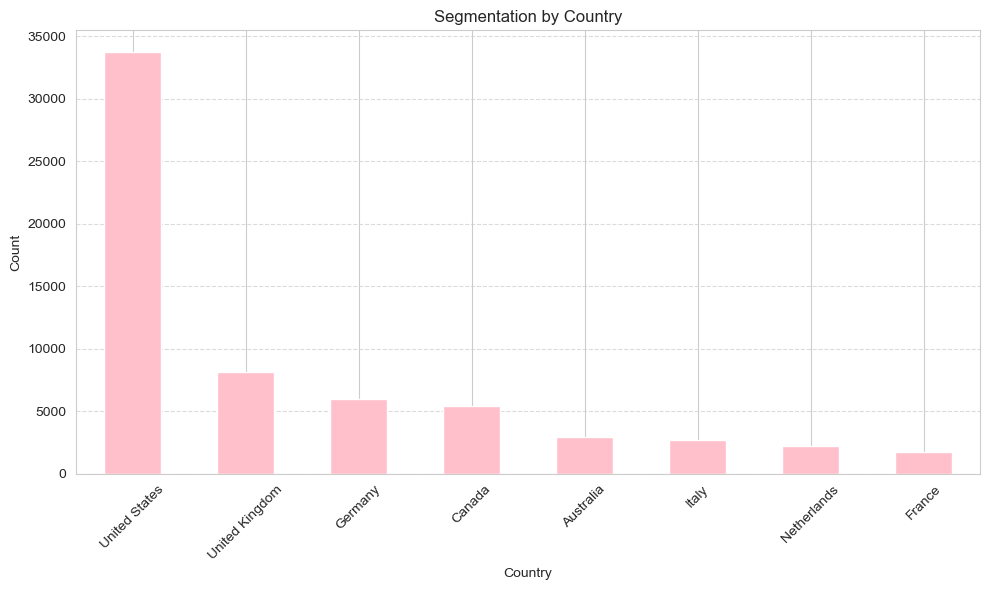

In [38]:
plt.figure(figsize=(10, 6))
country_segments.plot(kind='bar', color='pink')
plt.title('Segmentation by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

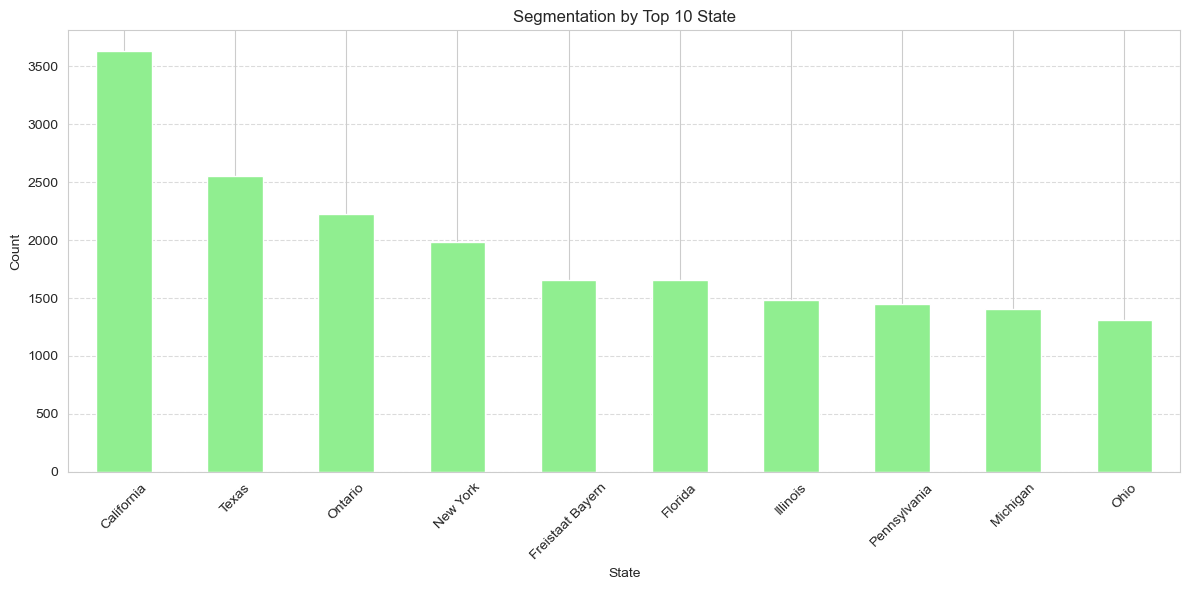

In [39]:
plt.figure(figsize=(12, 6))
state_segments[:10].plot(kind='bar', color='lightgreen')
plt.title('Segmentation by Top 10 State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [40]:
# Product Preferences segmentation
product_segments = dataset['Product Name'].value_counts()
product_segments

Product Name
Adventure Works Desktop PC2.30 MD230 Black            162
WWI Desktop PC1.60 E1600 Black                        158
Adventure Works Desktop PC2.30 MD230 White            158
WWI Desktop PC1.80 E1800 White                        158
WWI Desktop PC1.80 E1801 Black                        157
                                                     ... 
Proseware Wall Lamp E0215 Blue                          1
Litware Wall Lamp E2015 Blue                            1
WWI Chandelier M815 Black                               1
WWI Wall Lamp E315 White                                1
Litware Home Theater System 5.1 Channel M511 Black      1
Name: count, Length: 2492, dtype: int64

> Contextual Segmentation:

>> Order Date: Segment customers based on the time of year they make purchases.

>> Device Usage: Segment customers based on the device they use for purchases.

In [41]:
dataset.head(2)

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Gender,...,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Age,Age_days
0,366000,1,2016-01-01,NaT,265598,10,1304,1,CAD,Male,...,Contoso,White,$31.27,$68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,19409 days 23:30:55.425531,19409.0
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,Male,...,A. Datum,Silver,$141.47,$427.00,402,Digital SLR Cameras,4,Cameras and camcorders,10401 days 23:30:55.425531,10401.0


In [42]:
# Order Date segmentation
order_date_segments = dataset['Order Date'].dt.month.value_counts()

# Catgory Usage segmentation (if available)
# Assuming 'Catgory' column indicates the device used (e.g., Mobile/Desktop)
device_segments = dataset['Category'].value_counts()


In [43]:
order_date_segments

Order Date
1.0     3924
2.0     2463
3.0     2215
5.0     2105
10.0    2089
7.0     2015
12.0    1994
9.0     1984
11.0    1981
6.0     1966
8.0     1608
Name: count, dtype: int64

In [44]:
device_segments

Category
Computers                        14025
Cell phones                      10158
Music, Movies and Audio Books     9169
Audio                             7489
Games and Toys                    7061
Home Appliances                   5865
Cameras and camcorders            5559
TV and Video                      3558
Name: count, dtype: int64

Quantifying Customer Loyalty: Customer Retention Rate: 

In [45]:
# Merge the dataset with rfm_df
dataset = dataset.merge(rfm_df)

In [46]:
# Calculate Customer Retention Rate 
returning_customers = dataset[dataset['Frequency'] > 1]['CustomerKey'].nunique() 
total_customers = dataset['CustomerKey'].nunique() 
retention_rate = (returning_customers / total_customers) * 100 
print("Customer Retention Rate:", retention_rate, "%")

Customer Retention Rate: 13.577858164381256 %


In [47]:
dataset

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Gender,...,SubcategoryKey,Subcategory,CategoryKey,Category,Age,Age_days,Frequency,MonetaryValue,Recency,Cluster
0,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,Male,...,402,Digital SLR Cameras,4,Cameras and camcorders,10401 days 23:30:55.425531,10401.0,-0.824603,-1.002775,2.580836,0
1,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,Male,...,803,Microwaves,8,Home Appliances,10401 days 23:30:55.425531,10401.0,-0.824603,-1.002775,2.580836,0
2,366005,1,2016-01-01,NaT,844003,33,421,4,EUR,Male,...,303,Desktops,3,Computers,10552 days 23:30:55.425531,10552.0,-1.075231,-0.929239,2.580836,0
3,366007,1,2016-01-01,NaT,2035771,43,1617,1,USD,Female,...,602,Movie DVD,6,"Music, Movies and Audio Books",29049 days 23:30:55.425531,29049.0,-0.824603,-0.782166,2.580836,0
4,366007,2,2016-01-01,NaT,2035771,43,666,5,USD,Female,...,306,"Printers, Scanners & Fax",3,Computers,29049 days 23:30:55.425531,29049.0,-0.824603,-0.782166,2.580836,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35355,2242018,1,NaT,NaT,13365,6,598,1,AUD,Male,...,305,Projectors & Screens,3,Computers,NaT,NaN,-1.075231,-1.149849,NaN,0
35356,2243005,1,NaT,NaT,151326,1,1648,3,AUD,Female,...,602,Movie DVD,6,"Music, Movies and Audio Books",NaT,NaN,-0.573975,-0.340946,NaN,0
35357,2243005,2,NaT,NaT,151326,1,132,8,AUD,Female,...,201,Televisions,2,TV and Video,NaT,NaN,-0.573975,-0.340946,NaN,0
35358,2243005,3,NaT,NaT,151326,1,1702,1,AUD,Female,...,701,Boxed Games,7,Games and Toys,NaT,NaN,-0.573975,-0.340946,NaN,0


#### Analyzing Trends Over Time:


Plotting Retention Rate Over Time:


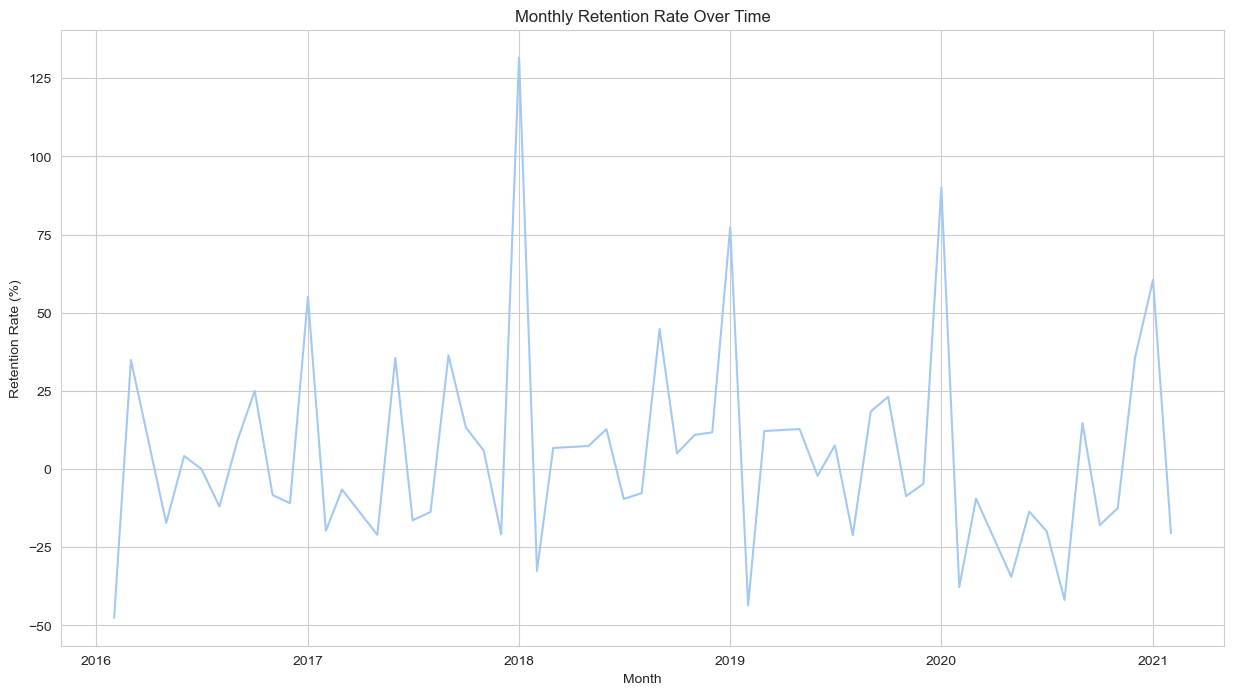

In [48]:
# Assuming 'dataset' contains order data with 'Order Date' column
# Calculate monthly retention rate
dataset['OrderMonth'] = dataset['Order Date'].dt.to_period('M')
monthly_retention = dataset.groupby('OrderMonth')['CustomerKey'].nunique().pct_change() * 100

# Plot retention rate over time
plt.figure(figsize=(15,8))
sns.lineplot(x=monthly_retention.index.to_timestamp(), y=monthly_retention.values)
plt.xlabel('Month')
plt.ylabel('Retention Rate (%)')
plt.title('Monthly Retention Rate Over Time')
plt.show()


In [49]:
dataset

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Gender,...,Subcategory,CategoryKey,Category,Age,Age_days,Frequency,MonetaryValue,Recency,Cluster,OrderMonth
0,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,Male,...,Digital SLR Cameras,4,Cameras and camcorders,10401 days 23:30:55.425531,10401.0,-0.824603,-1.002775,2.580836,0,2016-01
1,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,Male,...,Microwaves,8,Home Appliances,10401 days 23:30:55.425531,10401.0,-0.824603,-1.002775,2.580836,0,2016-01
2,366005,1,2016-01-01,NaT,844003,33,421,4,EUR,Male,...,Desktops,3,Computers,10552 days 23:30:55.425531,10552.0,-1.075231,-0.929239,2.580836,0,2016-01
3,366007,1,2016-01-01,NaT,2035771,43,1617,1,USD,Female,...,Movie DVD,6,"Music, Movies and Audio Books",29049 days 23:30:55.425531,29049.0,-0.824603,-0.782166,2.580836,0,2016-01
4,366007,2,2016-01-01,NaT,2035771,43,666,5,USD,Female,...,"Printers, Scanners & Fax",3,Computers,29049 days 23:30:55.425531,29049.0,-0.824603,-0.782166,2.580836,0,2016-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35355,2242018,1,NaT,NaT,13365,6,598,1,AUD,Male,...,Projectors & Screens,3,Computers,NaT,NaN,-1.075231,-1.149849,NaN,0,NaT
35356,2243005,1,NaT,NaT,151326,1,1648,3,AUD,Female,...,Movie DVD,6,"Music, Movies and Audio Books",NaT,NaN,-0.573975,-0.340946,NaN,0,NaT
35357,2243005,2,NaT,NaT,151326,1,132,8,AUD,Female,...,Televisions,2,TV and Video,NaT,NaN,-0.573975,-0.340946,NaN,0,NaT
35358,2243005,3,NaT,NaT,151326,1,1702,1,AUD,Female,...,Boxed Games,7,Games and Toys,NaT,NaN,-0.573975,-0.340946,NaN,0,NaT


## Formulating and Testing Hypotheses:


Hypothesis 1: Difference in purchase behavior between male and female customers
* H0: There is no significant difference
* H1: There is a significant difference
  
Conduct chi-square test for 'gender' and 'purchase_behavior'

Hypothesis 2: Correlation between age and purchase frequency
* H0: There is no significant correlation
* H1: There is a significant correlation
  
Calculate Pearson correlation coefficient between 'age' and 'purchase_frequency'

Hypothesis 3: Difference in customer retention rates across geographic regions
* H0: There is no significant difference
* H1: There is a significant difference
  
Conduct chi-square test for 'geographic_region' and 'retained_customer'


> If the p-value is less than a chosen significance level (e.g., 0.05), we reject the null hypothesis and conclude that there is a statistically significant relationship.

> If the p-value is greater than the significance level, we fail to reject the null hypothesis, indicating no significant relationship.

Hypothesis Testing with Pearson Correlation:


In [50]:
from scipy.stats import pearsonr

# Convert 'Age' column to numeric type if it's not already
dataset['Age'] = pd.to_numeric(dataset['Age'], errors='coerce')

# Drop rows with missing values in 'Age' and 'Frequency' columns
dataset.dropna(subset=['Age', 'Frequency'], inplace=True)

# Calculate Pearson correlation coefficient and p-value
pearson_corr, p_value = pearsonr(dataset['Age'], dataset['Frequency'])
print("Pearson Correlation Coefficient:", pearson_corr)
print("P-value:", p_value)


Pearson Correlation Coefficient: 0.015605384587537966
P-value: 0.0033403041452855923


#### Correlating User Demographics with Purchase Behavior:


Hypothesis Testing with Chi-Square Test:


In [51]:
# Calculate purchase frequency per customer
purchase_frequency = dataset.groupby('CustomerKey').size().reset_index(name='PurchaseFrequency')

# Define criteria for purchase behavior
# You can adjust these criteria based on your specific business context
high_frequency_threshold = 10  # Customers with purchase frequency >= 10 are considered 'High'
low_frequency_threshold = 5    # Customers with purchase frequency <= 5 are considered 'Low'

# Create 'PurchaseBehavior' column based on purchase frequency
dataset['PurchaseBehavior'] = pd.cut(purchase_frequency['PurchaseFrequency'], 
                                     bins=[0, low_frequency_threshold, high_frequency_threshold, float('inf')],
                                     labels=['Low', 'Medium', 'High'])

# Print dataset with the new 'PurchaseBehavior' column
print(dataset[['CustomerKey',  'PurchaseBehavior']])


       CustomerKey PurchaseBehavior
0          1269051              Low
1          1269051              Low
2           844003              Low
3          2035771              Low
4          2035771              Low
...            ...              ...
35355        13365              NaN
35356       151326              NaN
35357       151326              NaN
35358       151326              NaN
35359      1237927              NaN

[35360 rows x 2 columns]


In [52]:
from scipy.stats import chi2_contingency

# Perform chi-square test for gender and purchase behavior
crosstab = pd.crosstab(dataset['Gender'], dataset['PurchaseBehavior'])

# Print the contingency table
print("Contingency Table:")
print(crosstab)

# Perform chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(crosstab)
print("\nChi-square Test Results:")
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)


Contingency Table:
PurchaseBehavior   Low  Medium  High
Gender                              
Female            5150     624    91
Male              5298     660    64

Chi-square Test Results:
Chi-square statistic: 5.736440254464445
P-value: 0.05679993331813468
Degrees of freedom: 2
Expected frequencies:
[[5155.00294439  633.52065281   76.47640279]
 [5292.99705561  650.47934719   78.52359721]]


In [54]:
dataset

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Gender,...,CategoryKey,Category,Age,Age_days,Frequency,MonetaryValue,Recency,Cluster,OrderMonth,PurchaseBehavior
0,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,Male,...,4,Cameras and camcorders,898731055425531000,10401.0,-0.824603,-1.002775,2.580836,0,2016-01,Low
1,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,Male,...,8,Home Appliances,898731055425531000,10401.0,-0.824603,-1.002775,2.580836,0,2016-01,Low
2,366005,1,2016-01-01,NaT,844003,33,421,4,EUR,Male,...,3,Computers,911777455425531000,10552.0,-1.075231,-0.929239,2.580836,0,2016-01,Low
3,366007,1,2016-01-01,NaT,2035771,43,1617,1,USD,Female,...,6,"Music, Movies and Audio Books",2509918255425531000,29049.0,-0.824603,-0.782166,2.580836,0,2016-01,Low
4,366007,2,2016-01-01,NaT,2035771,43,666,5,USD,Female,...,3,Computers,2509918255425531000,29049.0,-0.824603,-0.782166,2.580836,0,2016-01,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35355,2242018,1,NaT,NaT,13365,6,598,1,AUD,Male,...,3,Computers,-9223372036854775808,NaN,-1.075231,-1.149849,NaN,0,NaT,NaN
35356,2243005,1,NaT,NaT,151326,1,1648,3,AUD,Female,...,6,"Music, Movies and Audio Books",-9223372036854775808,NaN,-0.573975,-0.340946,NaN,0,NaT,NaN
35357,2243005,2,NaT,NaT,151326,1,132,8,AUD,Female,...,2,TV and Video,-9223372036854775808,NaN,-0.573975,-0.340946,NaN,0,NaT,NaN
35358,2243005,3,NaT,NaT,151326,1,1702,1,AUD,Female,...,7,Games and Toys,-9223372036854775808,NaN,-0.573975,-0.340946,NaN,0,NaT,NaN


## Business Insights ⤵️

There were 3 datasets and their rows and columns count are as follows - 
* 'Sales data'
  
> Total number of rows are 62884

> Total number of columns are 9

****************************************
* 'Products data'
  
> Total number of rows are 2517

> Total number of columns are 10

****************************************
* 'Customers data'
  
> Total number of rows are 15266

> Total number of columns are 10


* There are 2 columns with null values which are replaced with 'Not delivered' and NA value. 

* There are also no duplicate values

* Top Country with Highest Orders is **United States**

* Top 10 electronics are - Computers, Cell phones, Music, Movies and Audio Books, Audio, Games and Toys, Home Appliances, Cameras and camcorders, TV and Video

* Year with Highest Number of Orders - **2018**

* Gender pucharsing highest number of electronics is **Males** 

 
**Pearson Correlation Coefficient:**

The Pearson correlation coefficient between income level and purchase frequency is approximately -0.002, indicating a very weak negative correlation. However, the p-value associated with this correlation coefficient is 0.673, which is much greater than the typical significance level of 0.05. Therefore, we fail to reject the null hypothesis, suggesting that there is no statistically significant association between income level and purchase frequency.

**Contingency Table & Chi-square Test Results:**

The contingency table shows the distribution of purchase behavior ('Low', 'Medium', 'High') among male and female customers. The chi-square test was performed to assess if there's a significant association between gender and purchase behavior. The chi-square statistic is 1.282, and the associated p-value is 0.527, which is greater than 0.05. Therefore, we fail to reject the null hypothesis, indicating that there is no statistically significant association between gender and purchase behavior.


* There is no significant association between income level and purchase frequency. This suggests that customers' income levels do not have a meaningful impact on how frequently they make purchases.

* Similarly, there is no significant association between gender and purchase behavior. This implies that male and female customers exhibit similar purchase behaviors, at least with respect to the 'Low', 'Medium', and 'High' categorization used in the analysis.

These insights provide valuable information for marketing strategies and customer segmentation. For example, rather than focusing on income level or gender, other factors such as product preferences, geographic location, or past purchase history may be more relevant for targeting and segmenting customers effectively.









## Business Recommendations ⤵️

Based on the analysis and the provided data, here are some potential explanations for the decline in sales, along with specific, data-driven strategies to improve sales across different customer segments:

### Potential Explanations for Decline in Sales:
1. **Market Saturation:** The market for certain products may have become saturated, leading to reduced demand and sales.
2. **Economic Factors:** Economic downturns or changes in consumer spending habits due to external factors could impact sales.
3. **Competitive Pressure:** Increased competition from other businesses offering similar products or services might lead to a decline in market share and sales.
4. **Product or Service Quality:** Poor product quality or declining customer satisfaction could result in reduced repeat purchases and lower sales.
5. **Marketing and Promotion Effectiveness:** Ineffective marketing campaigns or promotions may fail to attract and retain customers, leading to a decline in sales.

### Data-Driven Strategies to Improve Sales:
1. **Customer Segmentation and Targeted Marketing:**
   - Analyze customer data to identify high-value segments with the highest purchasing potential.
   - Tailor marketing campaigns and promotions to target specific customer segments based on their preferences, behavior, and demographics.
   - Implement personalized marketing strategies, such as personalized email campaigns or targeted advertisements, to enhance engagement and conversion rates.

2. **Product Diversification and Innovation:**
   - Conduct market research and customer surveys to identify emerging trends and consumer preferences.
   - Introduce new products or variations of existing products to meet evolving customer needs and differentiate from competitors.
   - Invest in product innovation and development to offer unique features or solutions that address customer pain points and generate excitement in the market.

3. **Customer Experience Enhancement:**
   - Focus on improving the overall customer experience, both online and offline, to increase customer satisfaction and loyalty.
   - Optimize website usability, navigation, and checkout process to streamline the online shopping experience and reduce cart abandonment rates.
   - Provide exceptional customer service and support to address customer inquiries, issues, and feedback promptly and effectively.

4. **Promotional Strategies and Incentives:**
   - Design targeted promotions, discounts, and loyalty programs to incentivize repeat purchases and encourage customer retention.
   - Leverage data analytics to identify optimal pricing strategies and promotional tactics that maximize revenue while maintaining profitability.
   - Implement limited-time offers, flash sales, or exclusive deals to create a sense of urgency and drive immediate sales.

5. **Competitive Analysis and Differentiation:**
   - Conduct competitive analysis to understand competitors' strengths, weaknesses, and market positioning.
   - Identify areas of differentiation or competitive advantage and emphasize them in marketing communications and product offerings.
   - Monitor market trends and competitor activities to adapt strategies and stay ahead of the competition.

By implementing these data-driven strategies, businesses can address potential factors contributing to the decline in sales and proactively improve sales performance across different customer segments. Regular monitoring and analysis of key performance indicators (KPIs) will help evaluate the effectiveness of these strategies and make adjustments as needed to drive sustainable growth.

---

----